# ***Student Perfromance Dataset / Classification***

*Imports*

In [104]:
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

*Functions*

In [105]:
# Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

# Trivial classifier - randomly outputs class labels with probability based on class priors
def trivial_classifier(Y_train, data):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/len(Y_train)*100, np.count_nonzero(y_grades_train == 1)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 2)/len(Y_train)*100, np.count_nonzero(y_grades_train == 3)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 4)/len(Y_train)*100]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

# Baseline Model - Nearest Means Classifier
def nearestMeansClassifier(X_train, Y_train, X_test):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    clf = NearestCentroid()
    clf.fit(X_train, y_grades_train)
    Y_test_grades_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_grades_pred[i] = clf.predict(X_test[i].reshape(1, -1))
    
    return Y_test_grades_pred

# Performance Measures
def get_performance(y, y_pred):
    macro_f1_score = f1_score(y, y_pred, average = 'macro')
    print("The macro F1 score for the classifier is - ", macro_f1_score)
    accuracy = f1_score(y, y_pred, average = 'micro')
    print("The accuracy for the classifier is - ", accuracy)
    cf_matrix = confusion_matrix(y, y_pred)
    labels = ['F', 'D', 'C', 'B', 'A']
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
        

In [106]:
def KNNClassifier(X, y, X_test, Y_test_actual):
    params = {  
                'n_neighbors'   :       [2,3,4,5],
                'algorithm'     :       ['ball_tree', 'kd_tree', 'brute', 'auto'],
                'leaf_size'     :       [ 10, 20, 30, 40, 50],
                'weights'       :       ['uniform', 'distance']
            } 
    neigh = KNeighborsClassifier()
    clf = GridSearchCV(estimator=neigh, param_grid=params, cv=10)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    #print('\n')
    print('Cross Validation Best Score', clf.best_score_)
    print('\n')
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def LogitClassifier(X, y, X_test, Y_test_actual):
    params= {
                'tol'   :   [1e-5, 0.5*1e-4, 1e-4, 2*1e-4, 1e-3],
                'solver':   ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }
    logreg = LogisticRegression(max_iter=100000)
    clf = GridSearchCV(estimator=logreg, param_grid=params, cv=10)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    #print('\n')
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def KernelSVMClassifier(X, y, X_test, Y_test_actual):
    params= {
                'C'             :   [0.8, 0.9, 1.0, 1.1, 1.2],
                'kernel'        :   ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree'        :   [2, 3, 4],
                'coef0'         :   [0.0, 0.1, 0.2],
                'tol'           :   [1e-5, 0.5*1e-4, 1e-4, 2*1e-4, 1e-3],
                'gamma'         :   ['scale', 'auto'],
                'class_weight'  :   ['balanced', None]
            }
    svc = SVC()
    clf = GridSearchCV(estimator=svc, param_grid=params, cv=10)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    #print('\n')
    print('Cross Validation Best Score', clf.best_score_)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def MLPerceptromClassifier(X, y, X_test, Y_test_actual):
    pass

Read in the data

In [107]:
train_df = pd.read_csv('data/student_performance_test.csv')
#dataset_train = train_df.to_numpy()

In [108]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## **Problem 1**
- Predict first-period academic performance without any prior academic performance data: remove the G2 and G3 columns from the original dataset, then predict G1.

Removing categorical non-binary features and grades. 

In [109]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [110]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] 
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [111]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [112]:
y_test = test_df.loc[:, test_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1416024653312789
The accuracy for the classifier is -  0.26993865030674846


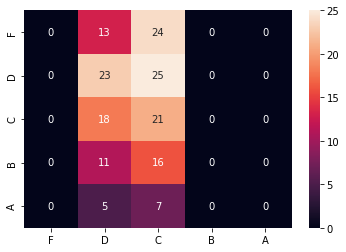

In [113]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.25381269372066273
The accuracy for the classifier is -  0.26380368098159507


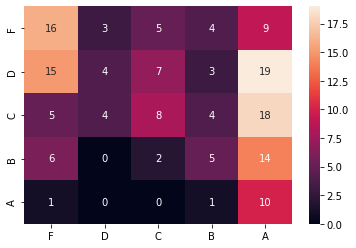

In [114]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing Data and encoding categorical data

In [115]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [116]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}
Cross Validation Best Score 0.32426470588235295


The macro F1 score for the classifier is -  0.5499751185144444
The accuracy for the classifier is -  0.6625766871165644


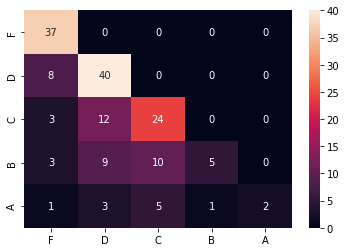

In [117]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**


/opt/homebrew/Caskroom/miniforge/base/envs/dlvenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dlvenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters from Cross Validation:  {'solver': 'liblinear', 'tol': 1e-05}
Cross Validation Best Score 0.3375
The macro F1 score for the classifier is -  0.6528582671283473
The accuracy for the classifier is -  0.6932515337423313


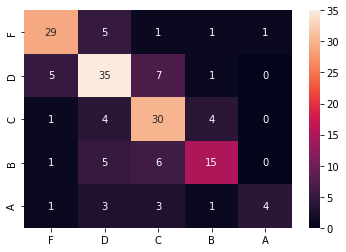

In [118]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.1, 'class_weight': None, 'coef0': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid', 'tol': 1e-05}
Cross Validation Best Score 0.39963235294117644
The macro F1 score for the classifier is -  0.4231751344552686
The accuracy for the classifier is -  0.5214723926380368


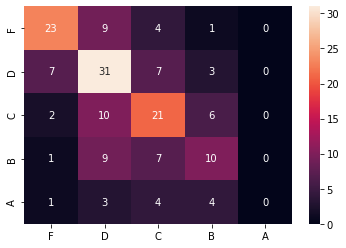

In [119]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [121]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the classifier is -  1.0
The accuracy for the classifier is -  1.0


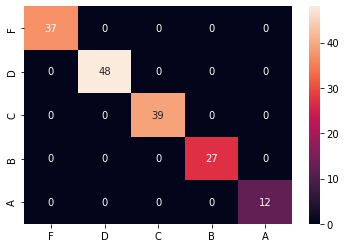

In [122]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

## **Problem 2**
- Predict final-period academic performance without any prior academic performance data: remove the G1 and G2 columns from the original dataset, then predict G3.

Removing categorical non-binary features and grades. 

In [123]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [124]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1278745644599303
The accuracy for the classifier is -  0.25153374233128833


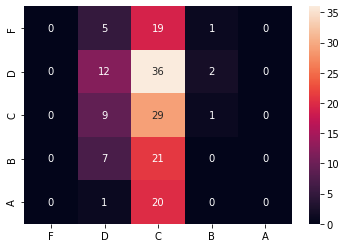

In [125]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.3601491228070175
The accuracy for the classifier is -  0.36809815950920244


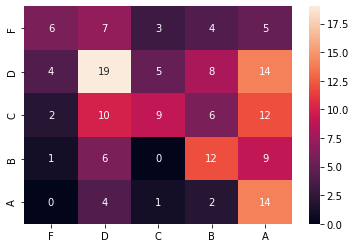

In [126]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.28786764705882356


The macro F1 score for the classifier is -  0.45352314352314343
The accuracy for the classifier is -  0.4723926380368098


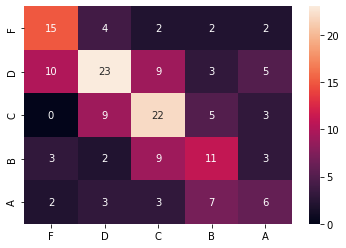

In [127]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'liblinear', 'tol': 1e-05}
Cross Validation Best Score 0.30220588235294116
The macro F1 score for the classifier is -  0.7694068894068894
The accuracy for the classifier is -  0.7607361963190185


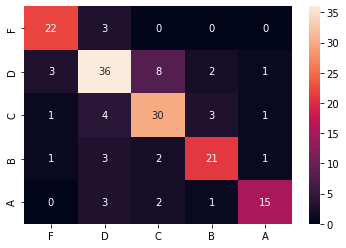

In [130]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.0, 'class_weight': 'balanced', 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1e-05}
Cross Validation Best Score 0.3386029411764706
The macro F1 score for the classifier is -  0.8933881096757107
The accuracy for the classifier is -  0.8895705521472392


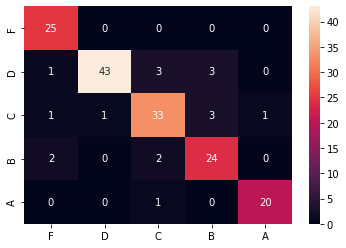

In [131]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [31]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  1.0
The accuracy for the trivial classifier is -  1.0


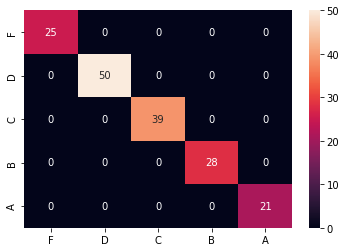

In [32]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

## **Problem 3**
- Predict final academic performance using all available prior academic performance data: Keep G1 and G2 columns inside the dataset as features, then predict G3.

Removing categorical non-binary features.

In [132]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [133]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1268864933417882
The accuracy for the classifier is -  0.25766871165644173


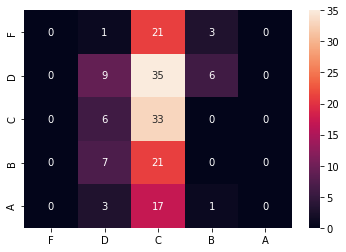

In [134]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.7349820799017304
The accuracy for the classifier is -  0.7116564417177914


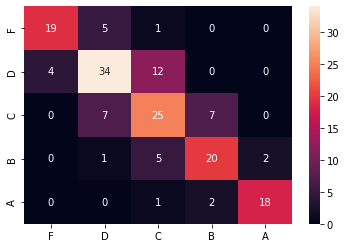

In [135]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing data and encoding categorical data

In [136]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [137]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.33786764705882355


The macro F1 score for the classifier is -  0.5735279773497209
The accuracy for the classifier is -  0.5766871165644172


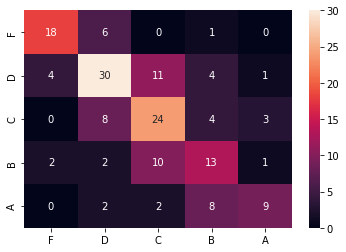

In [138]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'newton-cg', 'tol': 1e-05}
Cross Validation Best Score 0.4555147058823529
The macro F1 score for the classifier is -  0.9726635974255021
The accuracy for the classifier is -  0.9693251533742331


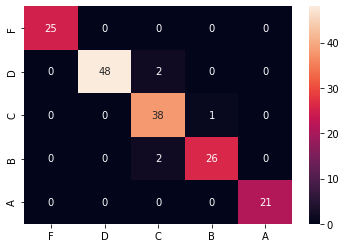

In [139]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.0, 'class_weight': 'balanced', 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'tol': 1e-05}
Cross Validation Best Score 0.5522058823529411
The macro F1 score for the classifier is -  0.9938319907940162
The accuracy for the classifier is -  0.9938650306748467


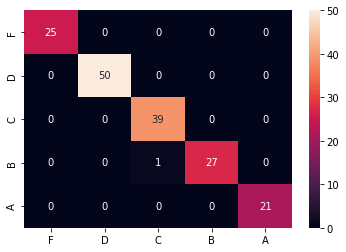

In [140]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [45]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  1.0
The accuracy for the trivial classifier is -  1.0


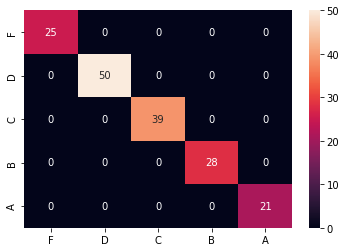

In [46]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)